In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing everything just in case :)

df = pd.read_csv(r'https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

# importing the file with our data

df.head(10)

# checking first 10 rows of data frame

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4


In [121]:
df.info()

# checking the dtype of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [122]:
df['Mean Score'] = pd.to_numeric(df['Mean Score'], errors='coerce')

# changing Mean Score to a numeric value

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   School DBN                   212331 non-null  object 
 1   School Name                  212331 non-null  object 
 2   School Level                 212331 non-null  object 
 3   Regents Exam                 212321 non-null  object 
 4   Year                         212331 non-null  int64  
 5   Total Tested                 212331 non-null  int64  
 6   Mean Score                   137109 non-null  float64
 7   Number Scoring Below 65      212331 non-null  object 
 8   Percent Scoring Below 65     212331 non-null  object 
 9   Number Scoring 65 or Above   212331 non-null  object 
 10  Percent Scoring 65 or Above  212331 non-null  object 
 11  Number Scoring 80 or Above   212331 non-null  object 
 12  Percent Scoring 80 or Above  212331 non-null  object 
 13 

In [124]:
drop_cols = ['Number Scoring Below 65', 'Percent Scoring Below 65',
            'Number Scoring 65 or Above', 'Percent Scoring 65 or Above',
            'Number Scoring 80 or Above', 'Percent Scoring 80 or Above',
            'Number Scoring CR', 'Percent Scoring CR']
df.drop(drop_cols, inplace = True, axis=1)

# dropping all columns I won't need

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   School DBN    212331 non-null  object 
 1   School Name   212331 non-null  object 
 2   School Level  212331 non-null  object 
 3   Regents Exam  212321 non-null  object 
 4   Year          212331 non-null  int64  
 5   Total Tested  212331 non-null  int64  
 6   Mean Score    137109 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 11.3+ MB


In [126]:
df[df['School DBN'] == '13K595']

# finding my son's school

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
8770,13K595,Bedford Academy High School,High school,Algebra2/Trigonometry,2015,23,74.4
8771,13K595,Bedford Academy High School,High school,Algebra2/Trigonometry,2016,39,68.1
8772,13K595,Bedford Academy High School,High school,Common Core Algebra,2015,73,75.3
8773,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,63,77.5
8774,13K595,Bedford Academy High School,High school,Common Core Algebra,2017,54,80.4
...,...,...,...,...,...,...,...
172712,13K595,Bedford Academy High School,High school,U.S. History and Government,2017,3,NaN
172713,13K595,Bedford Academy High School,High school,U.S. History and Government,2017,56,89.7
172714,13K595,Bedford Academy High School,High school,U.S. History and Government,2017,8,83.1
172715,13K595,Bedford Academy High School,High school,U.S. History and Government,2017,5,NaN


In [127]:
df[df['School DBN'] == '15K684']

# findng my daughter's school

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
9878,15K684,Millennium Brooklyn HS,High school,Algebra2/Trigonometry,2015,95,67.0
9879,15K684,Millennium Brooklyn HS,High school,Algebra2/Trigonometry,2016,186,71.4
9880,15K684,Millennium Brooklyn HS,High school,Algebra2/Trigonometry,2017,7,67.6
9881,15K684,Millennium Brooklyn HS,High school,Common Core Algebra,2015,103,71.3
9882,15K684,Millennium Brooklyn HS,High school,Common Core Algebra,2016,116,81.1
...,...,...,...,...,...,...,...
176997,15K684,Millennium Brooklyn HS,High school,U.S. History and Government,2017,12,92.0
176998,15K684,Millennium Brooklyn HS,High school,U.S. History and Government,2017,43,85.7
176999,15K684,Millennium Brooklyn HS,High school,U.S. History and Government,2017,33,87.1
177000,15K684,Millennium Brooklyn HS,High school,U.S. History and Government,2017,13,87.8


In [93]:
df['Year'].value_counts()

2016    76123
2015    72768
2017    63440
Name: Year, dtype: int64

In [94]:
df['Regents Exam'].value_counts()

Common Core Algebra                29254
Living Environment                 25539
U.S. History and Government        20426
Common Core English                19878
Global History and Geography       19192
Physical Settings/Earth Science    15971
Common Core Geometry               15267
Physical Settings/Chemistry        11670
English                            11091
Integrated Algebra                 11022
Algebra2/Trigonometry              10788
Geometry                            8509
Common Core Algebra2                7915
Physical Settings/Physics           5799
Name: Regents Exam, dtype: int64

In [59]:
df['Regents Exam'].fillna('Data Issue', inplace=True)

In [60]:
df['Regents Exam'].value_counts()

Common Core Algebra                29254
Living Environment                 25539
U.S. History and Government        20426
Common Core English                19878
Global History and Geography       19192
Physical Settings/Earth Science    15971
Common Core Geometry               15267
Physical Settings/Chemistry        11670
English                            11091
Integrated Algebra                 11022
Algebra2/Trigonometry              10788
Geometry                            8509
Common Core Algebra2                7915
Physical Settings/Physics           5799
Data Issue                            10
Name: Regents Exam, dtype: int64

In [99]:
df[df['School DBN'] == '13K595']

# finding my son's school

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
8770,13K595,Bedford Academy High School,High school,Algebra2/Trigonometry,2015,23,74.4
8771,13K595,Bedford Academy High School,High school,Algebra2/Trigonometry,2016,39,68.1
8772,13K595,Bedford Academy High School,High school,Common Core Algebra,2015,73,75.3
8773,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,63,77.5
8774,13K595,Bedford Academy High School,High school,Common Core Algebra,2017,54,80.4
...,...,...,...,...,...,...,...
172712,13K595,Bedford Academy High School,High school,U.S. History and Government,2017,3,NaN
172713,13K595,Bedford Academy High School,High school,U.S. History and Government,2017,56,89.7
172714,13K595,Bedford Academy High School,High school,U.S. History and Government,2017,8,83.1
172715,13K595,Bedford Academy High School,High school,U.S. History and Government,2017,5,NaN


In [129]:
data1= df[df['School DBN'] == '13K595']
data2 = df[df['School DBN'] == '15K684']
seldata = pd.concat([data1, data2], ignore_index=True)
# creating new data frame for 2 schools I want to compare

In [131]:
seldata

# checking the dataframe

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
0,13K595,Bedford Academy High School,High school,Algebra2/Trigonometry,2015,23,74.4
1,13K595,Bedford Academy High School,High school,Algebra2/Trigonometry,2016,39,68.1
2,13K595,Bedford Academy High School,High school,Common Core Algebra,2015,73,75.3
3,13K595,Bedford Academy High School,High school,Common Core Algebra,2016,63,77.5
4,13K595,Bedford Academy High School,High school,Common Core Algebra,2017,54,80.4
...,...,...,...,...,...,...,...
797,15K684,Millennium Brooklyn HS,High school,U.S. History and Government,2017,12,92.0
798,15K684,Millennium Brooklyn HS,High school,U.S. History and Government,2017,43,85.7
799,15K684,Millennium Brooklyn HS,High school,U.S. History and Government,2017,33,87.1
800,15K684,Millennium Brooklyn HS,High school,U.S. History and Government,2017,13,87.8


In [134]:
seldata.groupby(['Regents Exam'])['Total Tested'].count()

# checking the types of data (exams I can compare)

Regents Exam
Algebra2/Trigonometry              50
Common Core Algebra                74
Common Core Algebra2               46
Common Core English                48
Common Core Geometry               73
English                            35
Geometry                           41
Global History and Geography       75
Integrated Algebra                 17
Living Environment                 74
Physical Settings/Chemistry        68
Physical Settings/Earth Science    68
Physical Settings/Physics          60
U.S. History and Government        73
Name: Total Tested, dtype: int64

In [136]:
compare = seldata[seldata['Regents Exam'] == 'Global History and Geography']

# I picked the subject for comparison

In [137]:
compare

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
17,13K595,Bedford Academy High School,High school,Global History and Geography,2015,68,84.3
18,13K595,Bedford Academy High School,High school,Global History and Geography,2016,93,88.2
19,13K595,Bedford Academy High School,High school,Global History and Geography,2017,93,79.9
65,13K595,Bedford Academy High School,High school,Global History and Geography,2015,65,NaN
66,13K595,Bedford Academy High School,High school,Global History and Geography,2015,3,NaN
...,...,...,...,...,...,...,...
717,15K684,Millennium Brooklyn HS,High school,Global History and Geography,2017,19,88.1
718,15K684,Millennium Brooklyn HS,High school,Global History and Geography,2017,27,81.4
719,15K684,Millennium Brooklyn HS,High school,Global History and Geography,2017,41,83.8
720,15K684,Millennium Brooklyn HS,High school,Global History and Geography,2017,17,85.1


In [138]:
compare.dropna()

# dropping off all missing values

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
17,13K595,Bedford Academy High School,High school,Global History and Geography,2015,68,84.3
18,13K595,Bedford Academy High School,High school,Global History and Geography,2016,93,88.2
19,13K595,Bedford Academy High School,High school,Global History and Geography,2017,93,79.9
67,13K595,Bedford Academy High School,High school,Global History and Geography,2016,87,88.9
68,13K595,Bedford Academy High School,High school,Global History and Geography,2016,6,78.3
69,13K595,Bedford Academy High School,High school,Global History and Geography,2017,83,80.5
70,13K595,Bedford Academy High School,High school,Global History and Geography,2017,10,74.4
129,13K595,Bedford Academy High School,High school,Global History and Geography,2015,65,84.2
133,13K595,Bedford Academy High School,High school,Global History and Geography,2017,84,79.0
134,13K595,Bedford Academy High School,High school,Global History and Geography,2017,9,88.3


In [226]:
avgperyear = compare.groupby(['Year','School Name']).mean()

# comparing scores for 2015-2017

In [227]:
avgperyear

Total Tested  Mean Score
Year School Name                                          
2015 Bedford Academy High School     26.153846   84.866667
     Millennium Brooklyn HS          63.846154   83.236364
2016 Bedford Academy High School     38.750000   86.550000
     Millennium Brooklyn HS          72.916667   84.783333
2017 Bedford Academy High School     38.750000   79.933333
     Millennium Brooklyn HS          60.000000   85.554545

In [228]:
del avgperyear["Total Tested"]

# deleting Total Tested column

In [230]:
avgperyear.info

<bound method DataFrame.info of                                   Mean Score
Year School Name                            
2015 Bedford Academy High School   84.866667
     Millennium Brooklyn HS        83.236364
2016 Bedford Academy High School   86.550000
     Millennium Brooklyn HS        84.783333
2017 Bedford Academy High School   79.933333
     Millennium Brooklyn HS        85.554545>

Text(0, 0.5, '')

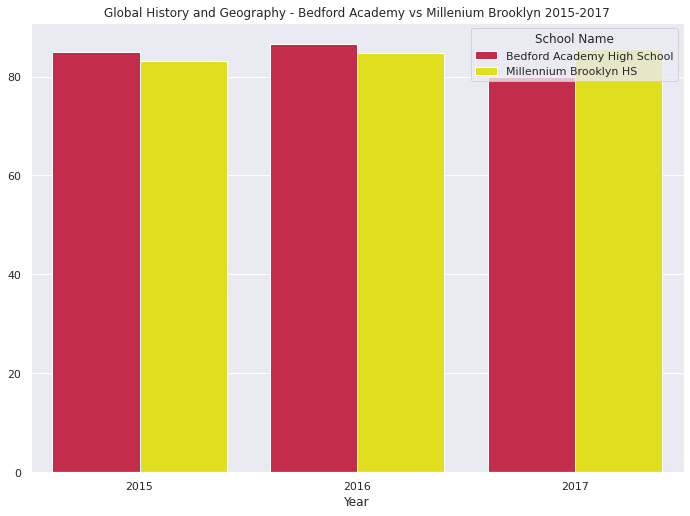

In [271]:
bp = sns.barplot(x="Year",
           y="Mean Score",
           hue="School Name",
           palette=['crimson', 'yellow'],
           data=compare,
           ci=None)

bp.set_title('Global History and Geography - Bedford Academy vs Millenium Brooklyn 2015-2017')
bp.set_ylabel(None)

Both schools perform pretty well in terms of test scores, however the big drop in Bedford Academy mean scores in 2017 is concerning.


Credit to Spatino87 & Timothy Yip (timsyip)
I don't think I could complete this assignment without looking at their ideas and methods.